In [1]:
%pwd

'C:\\Users\\Austin.Fligor\\Desktop'

In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn import preprocessing

In [3]:
df = pd.read_csv("C:\\Users\\Austin.Fligor\\Desktop\\WineQT.csv")

In [4]:
#View our data set
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#View data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#look at descriptive statistics of our data set
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


The average quality of wine in our data set  is ~ 5.66 with a std dev of ~ 0.81.

In [7]:
#Check for missing values in our data set
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

We have no missing values in this data set.

In [8]:
#Create x and y variable, quality will be our  variable since that is what we are trying to predict
y = df['quality']
X = df.loc[:, df.columns != 'quality']

In [9]:
#We do not need the Id for our X variables so we will drop it
X = X.drop('Id', axis = 1)

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
#Split our data into our test and training sets to use for our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Calculate our mutual information score to aid in feature selection for our model.
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train)

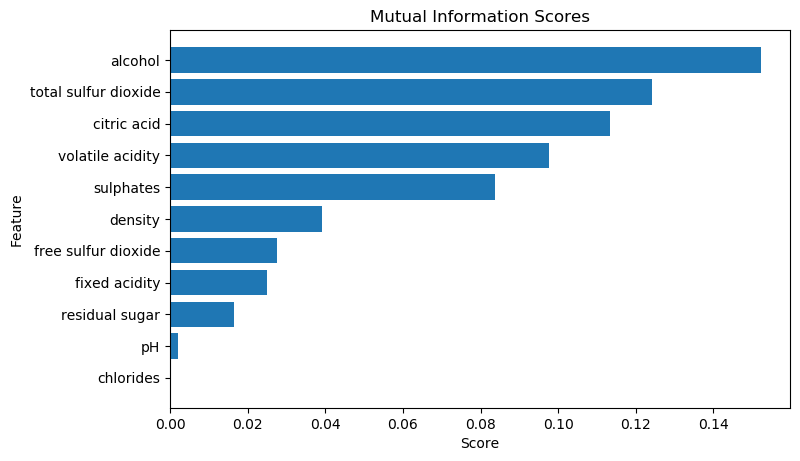

In [13]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Any variable with a score less than 0.04 with be dropped because the feature is not similar enough to our y variable and not signicant in prediction.

In [14]:
drop_cols = ["free sulfur dioxide","residual sugar","pH","fixed acidity","density"]
X_train = X_train.drop(drop_cols,axis=1)
X_test = X_test.drop(drop_cols,axis=1)

In [15]:
#Show our 6 features that remain
X_train.columns, X_test.columns

(Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
        'sulphates', 'alcohol'],
       dtype='object'),
 Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
        'sulphates', 'alcohol'],
       dtype='object'))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
features = X_train.columns

X_train[features] = scaler.transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

X_train.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
12,-1.402731,1.509693,0.116516,1.791223,0.568212,0.056613
758,-1.179203,1.509693,-0.284239,-1.185720,0.447770,0.894456
636,-1.235085,0.483394,-0.642809,-0.214297,0.206886,1.266830
1109,1.950176,-1.158685,-0.431885,-0.809685,-0.575987,-0.501948
743,-0.620386,-0.081071,0.369624,1.383852,-0.515766,-1.246697


In [18]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [19]:
LR_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.37476028074368917
Score the X-test  with Y-test  is :  0.31625618472969075


In [21]:
y_pred_LR=LR_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

 Model Evaluation Linear R : mean absolute error is  0.4788775452116719
 Model Evaluation Linear R : mean squared  error is  0.3804849643831768
 Model Evaluation Linear R : median absolute error is  0.3991059726001449


In [23]:
import joblib
joblib.dump(LR_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\LR_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\LR_model.pkl']

Now that we have created our Linear Regression model we will explore other models.

In [24]:
#Lets look at a logistic regression model
from sklearn.linear_model import LogisticRegression
Lo_model=LogisticRegression(solver='liblinear')

Lo_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.5897155361050328
Score the X-test  with Y-test  is :  0.6244541484716157


In [26]:
y_pred_Lo=Lo_model.predict(X_test)
#Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

 Model Evaluation Logistic R : mean absolute error is  0.40611353711790393
 Model Evaluation Logistic R : mean squared  error is  0.4672489082969432
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6244541484716157


In [27]:
joblib.dump(Lo_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\Lo_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\Lo_model.pkl']

In [28]:
#Now we will look at Decison tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [29]:
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9179431072210066
Score the X-test  with Y-test  is :  0.5589519650655022


In [31]:
#Show important columns
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.1738904  0.08774785 0.11626673 0.18085827 0.20258342 0.23865333]


In [32]:
X_train.head(0)

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol


Note alcohol importance is the highest at ~ 24%.

In [33]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.5589519650655022


In [34]:
joblib.dump(Tree_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\Tree_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\Tree_model.pkl']

In [35]:
#Now lets look at SVM
svc_model=SVC(C=50,kernel="rbf")
# fit model
svc_model.fit(X_train,y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.7811816192560175
Score the X-test  with Y-test  is :  0.6200873362445415
 Model Evaluation Decision Tree : accuracy score  0.6200873362445415


In [37]:
joblib.dump(svc_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\svc_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\svc_model.pkl']

In [38]:
#Now lets look at SVR
svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)
# fit model
svr_model.fit(X_train,y_train)

SVR(C=1.5, cache_size=200, coef0=1, degree=1, epsilon=0.001, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.48243940038980027
Score the X-test  with Y-test  is :  0.340578149225944
 Model Evaluation Decision Tree : accuracy score  0.6200873362445415


In [40]:
joblib.dump(svr_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\svr_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\svr_model.pkl']

In [41]:
#Now lets look a a K Neighbor Classifier
K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6947483588621444
Score the X-test  with Y-test  is :  0.5545851528384279
 Model Evaluation K Neighbors Classifier : accuracy score  0.5545851528384279


In [43]:
joblib.dump(K_model.fit(X_train,y_train), 'C:\\Users\\Austin.Fligor\\Desktop\\K_model.pkl')

['C:\\Users\\Austin.Fligor\\Desktop\\K_model.pkl']